In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns



In [2]:
# Exploration Idea # 1 : Loading and cleaning data

# Read the input file Automobile data and display the column names
cars_data = pd.read_csv('Automobile_data.txt')
print(cars_data.columns)

# Cleaning up data for unavailable or not applicable values; The same is represented by '?'
cars_data.replace('?',np.nan,inplace=True)
cars_data.isnull().sum()

# The field normalized-losses is not a significant field in my calculations, Hence making it zero when not available
cars_data['normalized-losses'].fillna(value=0, inplace=True)
cars_data.isnull().sum()

# The field num-of-doors , I am making it 4 when not available 

cars_data['num-of-doors'].fillna(value=4, inplace=True)
cars_data.isnull().sum()

# When data is not available in price , i am categorizing them as insufficient data and removing them from consideration

cars_data.dropna(subset=['price'],inplace=True) 

cars_data.price = pd.to_numeric(cars_data.price,errors='coerce')
#cars_data.isnull

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

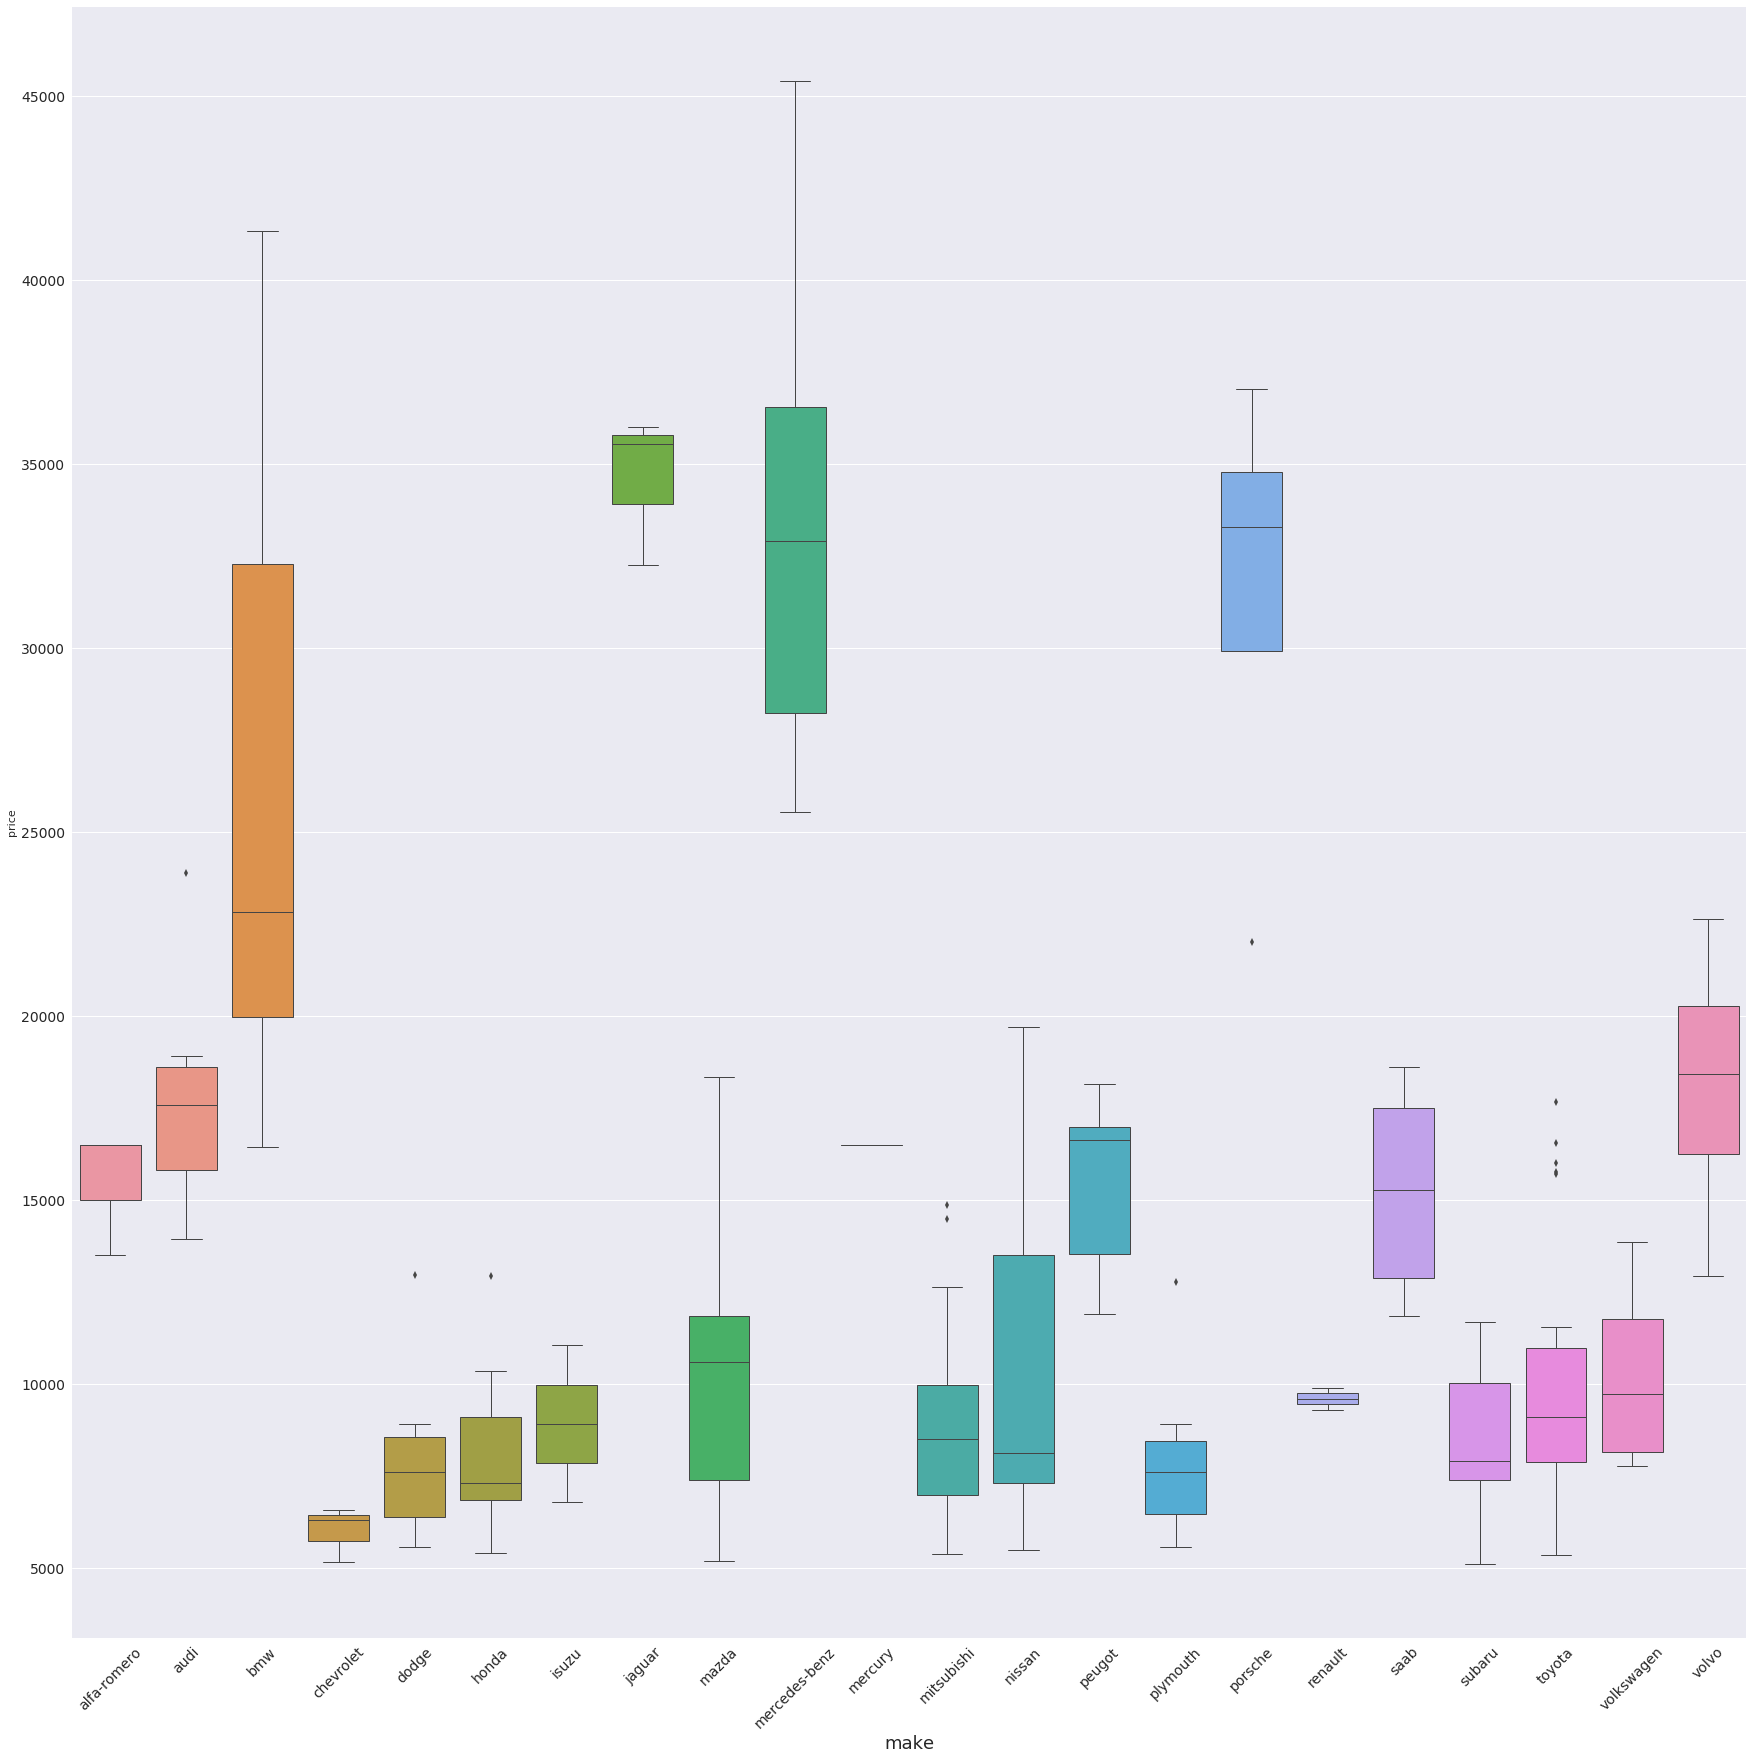

In [4]:
# Exploration Idea  : Variable analysis to see its impact on Automobile Pricing

# Brand or Make impact on Car Price explained with Box Plot
import seaborn as sns

A4_dim = (30,30)
fig,ax=plt.subplots(figsize=A4_dim)
plt.xticks( rotation=45)
plt.tick_params(labelsize = 14)
plt.xlabel('text',fontsize=18)
sns.boxplot(x='make',y='price',data=cars_data,linewidth=1)
plt.savefig('EX2BoxPlot_output.png')

In [3]:
# Exploration Idea 2 : Variable analysis to see its impact on Automobile Pricing

# A table which would show the average car pricing of Make with respect to Body-Style

table = pd.pivot_table(cars_data,values='price', index=['make'],columns=['body-style'],aggfunc=np.mean)

# When a particular body-style is not available for a make, missing data is shown as '-' 

table.replace(np.nan,'-',inplace=True)
table

body-style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
alfa-romero,14997.5,-,16500,-,-
audi,-,-,-,17647,18920
bmw,-,-,-,26118.8,-
chevrolet,-,-,5723,6575,-
dodge,-,-,7819.8,7619.67,8921
honda,-,-,7054.43,9945,7295
isuzu,-,-,11048,6785,-
jaguar,-,-,-,34600,-
mazda,-,-,10085,11464.1,-


In [13]:
#Exploration Idea 3 : Summary Statistics of Different Variables

# taking statistics as per Make

cars_data.groupby(['make']).describe()

city-mpg                                                      \
                 count       mean       std   min    25%   50%   75%   max   
make                                                                         
alfa-romero        3.0  20.333333  1.154701  19.0  20.00  21.0  21.0  21.0   
audi               6.0  19.333333  2.422120  17.0  18.25  19.0  19.0  24.0   
bmw                8.0  19.375000  3.248626  15.0  16.00  20.5  21.5  23.0   
chevrolet          3.0  41.000000  5.196152  38.0  38.00  38.0  42.5  47.0   
dodge              9.0  28.000000  5.545268  19.0  24.00  31.0  31.0  37.0   
honda             13.0  30.384615  6.589619  24.0  27.00  30.0  30.0  49.0   
isuzu              2.0  24.000000  0.000000  24.0  24.00  24.0  24.0  24.0   
jaguar             3.0  14.333333  1.154701  13.0  14.00  15.0  15.0  15.0   
mazda             17.0  25.705882  6.282562  16.0  19.00  26.0  31.0  36.0   
mercedes-benz      8.0  18.500000  3.817254  14.0  15.50  19.0  22.0  22.0   
mercury            1.0  19.000000       NaN  19.0  19.00  19.0  19.0  19.0   
mitsubishi        13.0  24.923077  5.298766  19.0  23.00  24.0  25.0  37.0   
nissan            18.0  27.000000  7.514691  17.0  19.00  31.0  31.0  45.0   
peugot            11.0  22.454545  4.297991  18.0  19.00  19.0  26.5  28.0   
plymouth           7.0  28.142857  6.067085  19.0  24.00  31.0  31.0  37.0   
porsche            4.0  17.500000  1.000000  17.0  17.00  17.0  17.5  19.0   
renault            2.0  23.000000  0.000000  23.0  23.00  23.0  23.0  23.0   
saab               6.0  20.333333  1.032796  19.0  19.50  21.0  21.0  21.0   
subaru            12.0  26.333333  2.933609  23.0  24.00  26.0  28.0  32.0   
toyota            32.0  27.500000  4.812618  19.0  24.00  27.0  30.0  38.0   
volkswagen        12.0  28.583333  5.976596  19.0  24.75  27.0  34.0  37.0   
volvo             11.0  21.181818  3.219260  17.0  18.50  23.0  23.5  26.0   

              compression-ratio             ...  wheel-base        width  \
                          count       mean  ...         75%    max count   
make                                        ...                            
alfa-romero                 3.0   9.000000  ...      91.550   94.5   3.0   
audi                        6.0   8.633333  ...     105.800  105.8   6.0   
bmw                         8.0   8.575000  ...     103.500  110.0   8.0   
chevrolet                   3.0   9.566667  ...      94.500   94.5   3.0   
dodge                       9.0   8.634444  ...      93.700  103.3   9.0   
honda                      13.0   9.215385  ...      96.500   96.5  13.0   
isuzu                       2.0   8.850000  ...      95.575   96.0   2.0   
jaguar                      3.0   9.233333  ...     113.000  113.0   3.0   
mazda                      17.0  10.488235  ...      98.800  104.9  17.0   
mercedes-benz               8.0  14.825000  ...     115.600  120.9   8.0   
mercury                     1.0   8.000000  ...     102.700  102.7   1.0   
mitsubishi                 13.0   8.061538  ...      96.300   96.3  13.0   
nissan                     18.0   9.794444  ...      97.200  100.4  18.0   
peugot                     11.0  14.000000  ...     114.200  114.2  11.0   
plymouth                    7.0   8.671429  ...      94.800  103.3   7.0   
porsche                     4.0   9.500000  ...      90.750   94.5   4.0   
renault                     2.0   8.700000  ...      96.100   96.1   2.0   
saab                        6.0   9.201667  ...      99.100   99.1   6.0   
subaru                     12.0   8.816667  ...      97.050   97.2  12.0   
toyota                     32.0  10.340625  ...     102.400  104.5  32.0   
volkswagen                 12.0  13.625000  ...      98.075  100.4  12.0   
volvo                      11.0  10.227273  ...     109.100  109.1  11.0   

                                                                       
                    mean       std   min     25%    50%     75%   max  
make              

['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']


/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

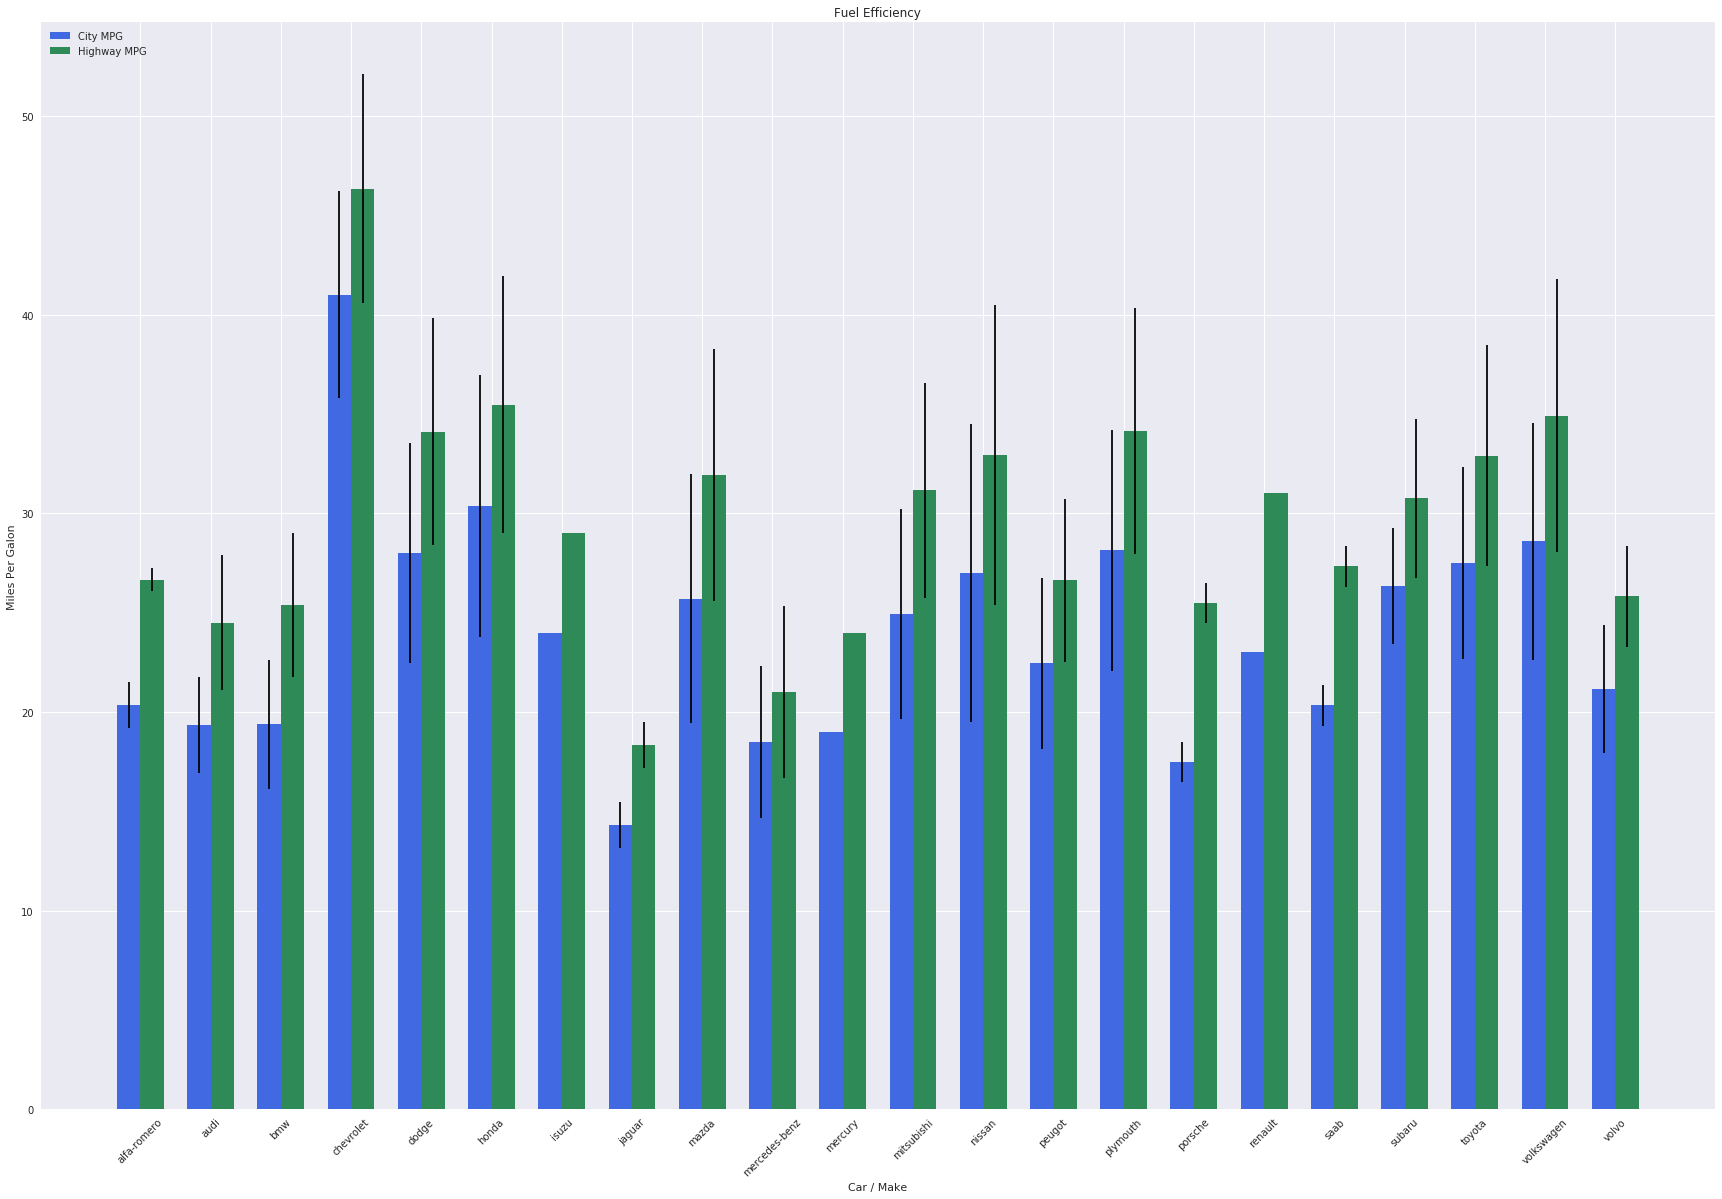

In [5]:
# Exploration Idea 4: Univariate & Bivariate Analysis

# Paired Box Plot for City MPG & Highway MPG


df2_grp = cars_data.groupby('make')
make = list(pd.unique(cars_data.make.values))
print(make)
cityMPG_mean = []
HighwayMPG_mean = []
cityMPG_std = []
HighwayMPG_std = []
for imake in make:
    cityMPG_mean.append(df2_grp.get_group(imake)['city-mpg'].mean())
    HighwayMPG_mean.append(df2_grp.get_group(imake)['highway-mpg'].mean())
    cityMPG_std.append(df2_grp.get_group(imake)['city-mpg'].std())
    HighwayMPG_std.append(df2_grp.get_group(imake)['highway-mpg'].std())


fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)


indices = range(len(cityMPG_mean))
width = np.min(np.diff(indices))/3.

ax.bar(indices-width/2., cityMPG_mean, width, color='royalblue',yerr=cityMPG_std,label='cityMPG')
ax.bar(indices+width/2., HighwayMPG_mean, width, color='seagreen', yerr=HighwayMPG_std,label='HighwayMPG')


ax.set_xticks(np.arange(len(make)))
ax.set_xticklabels(make,rotation=45,zorder=100)

MPG = ['City MPG', 'Highway MPG']

plt.xlabel ('Car / Make')
plt.ylabel ('Miles Per Galon')
plt.title('Fuel Efficiency')
plt.legend(MPG,loc=2)

plt.savefig('EX3BarPlot_output.png')

/srv/conda/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplot

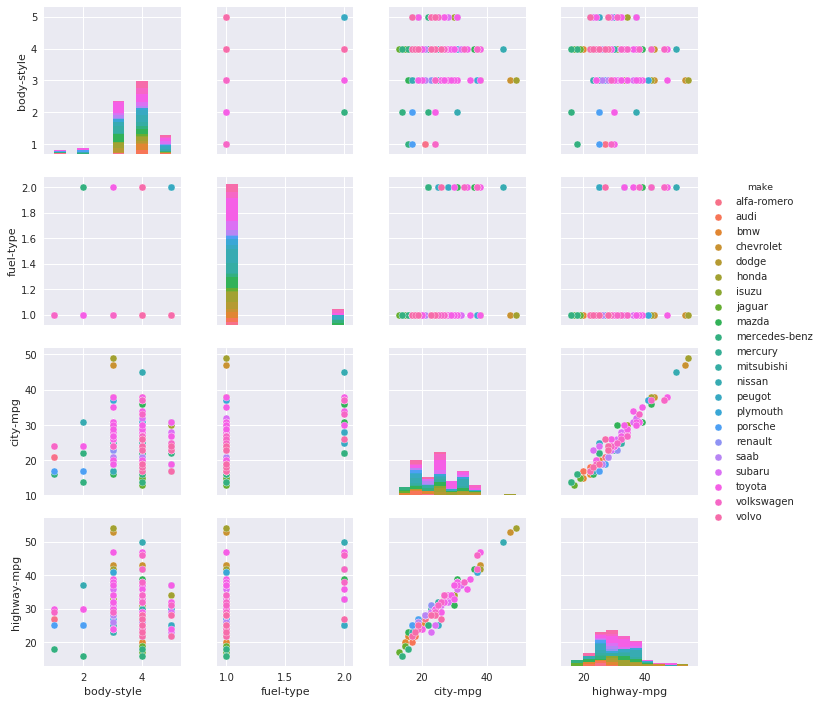

In [6]:
# Exploration Idea : Comparison of Make / Body style for the fuel efficiency

df1=cars_data[['make','body-style','fuel-type','city-mpg','highway-mpg']]


#Feature Engineering data - Categorical Variable ; Fuel Type Only two types - Gas & Diesel

df1['fuel-type'].replace('gas',1,inplace=True)
df1['fuel-type'].replace('diesel',2,inplace=True)

# Categorical Variable : Body-style : There are 5 types

df1['body-style'].replace('convertible',1,inplace=True)
df1['body-style'].replace('hardtop',2,inplace=True)
df1['body-style'].replace('hatchback',3,inplace=True)
df1['body-style'].replace('sedan',4,inplace=True)
df1['body-style'].replace('wagon',5,inplace=True)


sns_plot = sns.pairplot(df1, hue="make", palette="husl") 
sns_plot.savefig("PairPlot_output1.png")

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

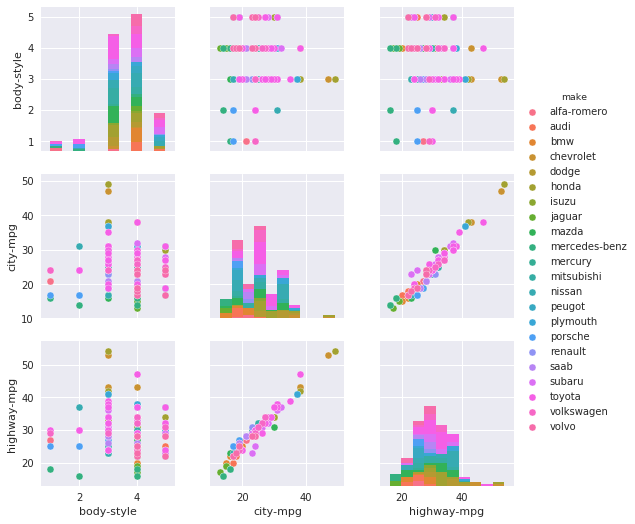

In [7]:
# Further extending our finding, we see there needs more analysis - lets separate the two fuel types

# In prior plot, we saw more pink in fuel-type = gas, lets analyze that data more.

df1=cars_data.loc[(cars_data['fuel-type'] == 'gas'),['make','body-style','city-mpg','highway-mpg']]

df1['body-style'].replace('convertible',1,inplace=True)
df1['body-style'].replace('hardtop',2,inplace=True)
df1['body-style'].replace('hatchback',3,inplace=True)
df1['body-style'].replace('sedan',4,inplace=True)
df1['body-style'].replace('wagon',5,inplace=True)


sns_plot = sns.pairplot(df1, hue="make", palette="husl")
sns_plot.savefig("PairPlot_Output2.png")

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

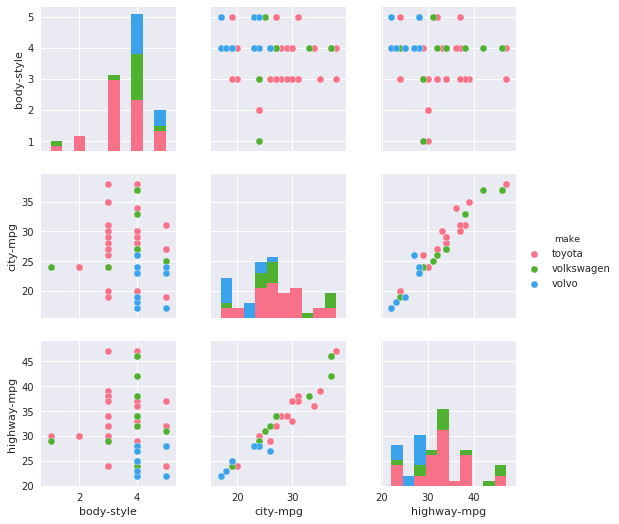

In [10]:
# Explore more of the pink part : toyota , volkswagen & volvo

df1=cars_data.loc[((cars_data['make'] == 'toyota') | (cars_data['make'] == 'volvo')| (cars_data['make'] == 'volkswagen')),['make','body-style','city-mpg','highway-mpg']]


#Body-style : There are 5 types

df1['body-style'].replace('convertible',1,inplace=True)
df1['body-style'].replace('hardtop',2,inplace=True)
df1['body-style'].replace('hatchback',3,inplace=True)
df1['body-style'].replace('sedan',4,inplace=True)
df1['body-style'].replace('wagon',5,inplace=True)

sns_plot = sns.pairplot(df1, hue="make", palette="husl") 
sns_plot.savefig("PairPlot_Output3.png")


/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

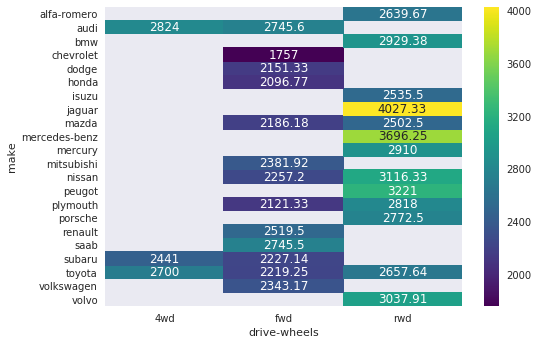

In [11]:
#Exploratory idea 5 : Make, curb-weight, Drive - Wheel Analysis

table = pd.pivot_table(cars_data,values='curb-weight', index=['make'],columns=['drive-wheels'],aggfunc=np.mean)
sns_plot = sns.heatmap(table, annot=True, fmt="g", cmap='viridis')
sns_plot.savefig("EX5_Heatmap.png")



In [12]:
# Exploratory Idea : A report what i infer from this data

print('***************************')
print ('Report : Make / Body Style')
print('***************************')

idx = cars_data.index[cars_data.price == cars_data['price'].max()]
result= cars_data.loc[idx,['make','body-style']]
print('Expensive Car : ' , result.to_string(index=False,header=False))

idx = cars_data.index[cars_data.price == cars_data['price'].min()]
result= cars_data.loc[idx,['make','body-style']]
print('Budget    Car : ' , result.to_string(index=False,header=False))

print('------------------------------------------------')

df1=cars_data[(cars_data['fuel-type']=='gas')]
idx = df1.index[df1['city-mpg'] == df1['city-mpg'].max()]
result= df1.loc[idx,['make','body-style']]
print('Car With Best Mileage in City - Gas    : ' , result.to_string(index=False,header=False))

idx = df1.index[df1['highway-mpg'] == df1['highway-mpg'].max()]
result= df1.loc[idx,['make','body-style']]
print('Car With Best Mileage in Highway - Gas : ' , result.to_string(index=False,header=False))

print('---------------------------------------------------')

df1=cars_data[(cars_data['fuel-type']=='diesel')]
idx = df1.index[df1['city-mpg'] == df1['city-mpg'].max()]
result= df1.loc[idx,['make','body-style']]
print('Car With Best Mileage in City - Diesel    : ' , result.to_string(index=False,header=False))

idx = df1.index[df1['highway-mpg'] == df1['highway-mpg'].max()]
result= df1.loc[idx,['make','body-style']]
print('Car With Best Mileage in Highway - Diesel : ' , result.to_string(index=False,header=False))

print('---------------------------------------------------')

#print('---------------------------------------------------')

cars_data.horsepower = pd.to_numeric(cars_data.horsepower,errors='coerce')

idx = cars_data.index[cars_data['horsepower'] == cars_data['horsepower'].max()]
result= cars_data.loc[idx,['make','body-style']]

print('Car With Best Horsepower :' , result.to_string(index=False,header=False))
print('---------------------------------------------------')

***************************
Report : Make / Body Style
***************************
Expensive Car :  mercedes-benz  hardtop
Budget    Car :  subaru  hatchback
------------------------------------------------
Car With Best Mileage in City - Gas    :  honda  hatchback
Car With Best Mileage in Highway - Gas :  honda  hatchback
---------------------------------------------------
Car With Best Mileage in City - Diesel    :  nissan  sedan
Car With Best Mileage in Highway - Diesel :  nissan  sedan
---------------------------------------------------
Car With Best Horsepower : jaguar  sedan
---------------------------------------------------
